In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [205]:
#importing data set
df = pd.read_csv('fcc-forum-pageviews.csv')

In [206]:
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [176]:
df.shape


(1304, 2)

In [202]:
df.describe()

,value,year
count,1060.000000,1060.000000
mean,60498.239623,2017.650000
std,23861.589745,0.954662
min,25527.000000,2016.000000
25%,40698.750000,2017.000000
50%,57197.500000,2018.000000
75%,76940.750000,2018.000000
max,112172.000000,2019.000000


C:\Users\Han\AppData\Local\Temp\ipykernel_7532\1698988666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


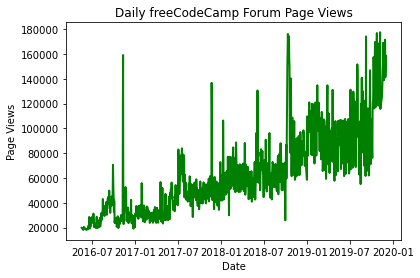

In [207]:
#remove top and bottom outliers 2.5%
df = df[(df["value"] > df["value"].quantile(0.025)) & (df["value"] < df["value"].quantile(0.975)) ]

#draw a line plot
df["date"] = pd.to_datetime(df["date"])
plt.plot(df["date"],df['value'],color='green',linewidth=2)
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp Forum Page Views")
plt.show()




    
    

Draw a bar plot with avg daily views per month grouped by year

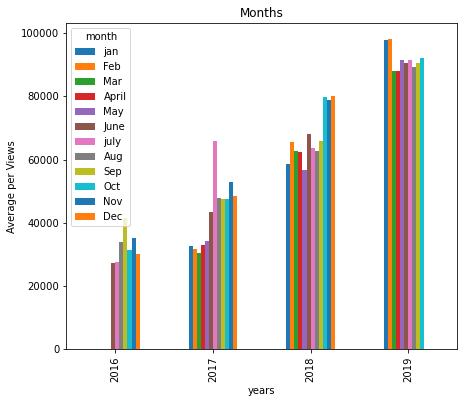

In [184]:

months = ["jan","Feb","Mar","April","May","June","july","Aug","Sep","Oct","Nov","Dec"]
df.set_index(["date"],inplace=True)
df["year"] = df.index.year
df["month"] = df.index.month
df["month"] = df["month"].apply(lambda data:months[data-1])
df["month"] = pd.Categorical(df["month"], categories=months)
Pivot_table = pd.pivot_table(df, values="value",index="year",columns="month",aggfunc=np.mean)
Value_plot = Pivot_table.plot(kind="bar")
fig = Value_plot.get_figure()
fig.set_size_inches(7,6)
Value_plot.set_xlabel("years")
Value_plot.set_ylabel("Average per Views")
Value_plot.set_title("Months")
plt.show()




Creating a draw boxplot

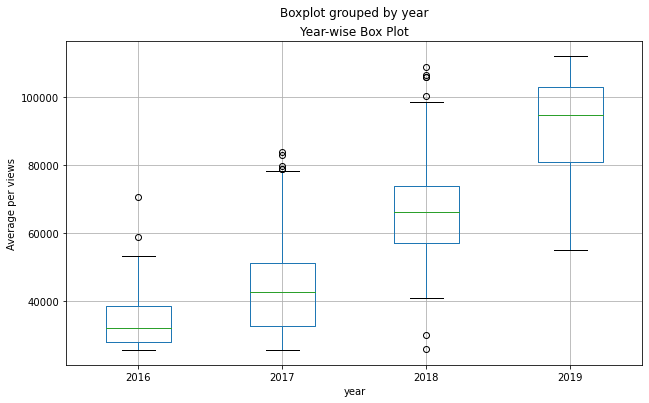

In [198]:
ax = df[['year', 'value']].boxplot(by='year', figsize=(10,6))
ax.set_ylabel('Average per views')
ax.set_xlabel('year')
ax.set_title('Year-wise Box Plot')
plt.savefig('boxplot1.png', dpi=300,bbox_inches='tight')
plt.show()


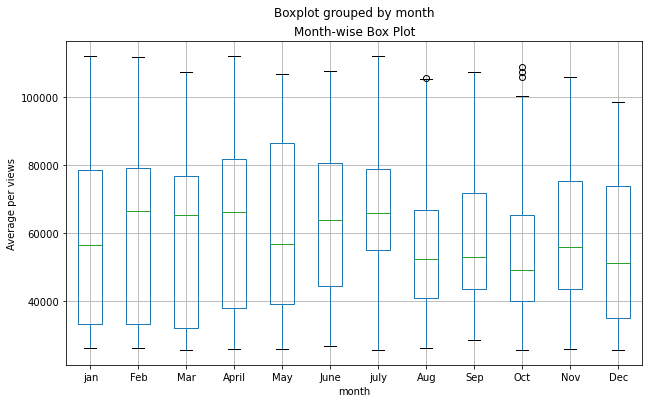

In [200]:
ax = df[['month', 'value']].boxplot(by='month', figsize=(10,6))
ax.set_ylabel('Average per views')
ax.set_xlabel('month')
ax.set_title('Month-wise Box Plot')
plt.savefig('boxplot2.png', dpi=100,bbox_inches='tight')
plt.show()

